## Sensor magnético HMC5883L

HMC5883L.

VCC => RED => 3.3V
GND => BLACK => GND
SDA => WHITE => pin #20 SDA
SCL => GREY => pin #21 SCL



In [4]:
from HMC5883L import *

In [5]:
ps = HMC5883L('/dev/tty.usbmodem146121')

KeyboardInterrupt: 

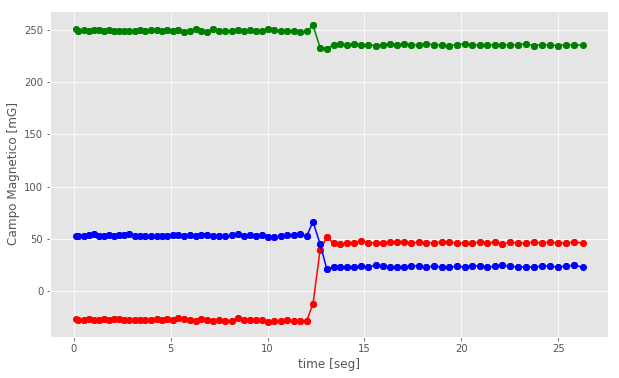

In [12]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

pl.style.use('ggplot')
pl.rcParams['figure.figsize'] = (10, 6)

t_offset = time.time()
t0 = 0
N = 1000
mag_x0 = None

while (1):
    mag = ps.getMAG()
    if mag is not None:
        t1 = time.time() - t_offset
        mag_x1 = mag[0]
        mag_y1 = mag[1]
        mag_z1 = mag[2]
        
        if mag_x0 is not None:
            pl.plot([t0, t1], [mag_x0, mag_x1], '-or')
            pl.plot([t0, t1], [mag_y0, mag_y1], '-og')
            pl.plot([t0, t1], [mag_z0, mag_z1], '-ob')
            pl.xlabel('time [seg]')
            pl.ylabel('Campo Magnetico [mG]')
            display.clear_output(wait=True)
            display.display(pl.gcf())
        mag_x0 = mag_x1
        mag_y0 = mag_y1
        mag_z0 = mag_z1
        t0 = t1
    